In [1]:
%run "_Common setup.ipynb"

In [2]:
search_str = [
    'TS=("scale issues" OR "multi-scale" OR "inter-scale")'
]

In [3]:
replace_cache = False
id_to_query, query_recs = wosis.query(search_str,
                                      replace_cache,
                                      wos_config, 
                                      time_span={'begin': '1970-01-01', 'end': '2019-08-12'},
                                      skip_refs=True,
                                      tmp_dir=CACHE_DIR)

In [4]:
RC = list(query_recs.values())[0]

corpora_df = wosis.rc_to_df(RC)
corpora_df, removed_pubs = wosis.remove_empty_DOIs(corpora_df)

Removing 6403 records with no DOIs


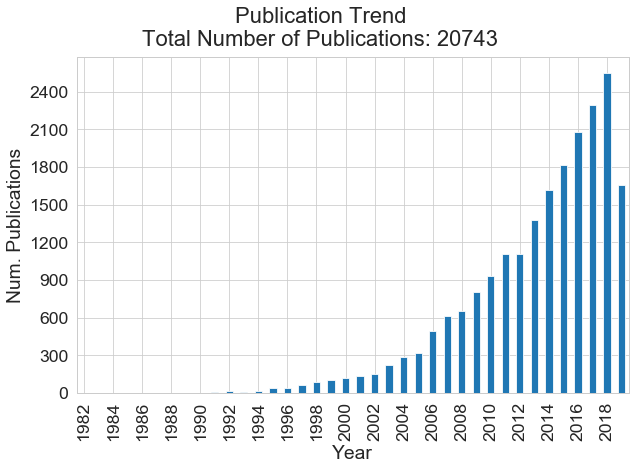

In [5]:
valid_DOI_RC = wosis.extract_recs(corpora_df.id, RC, name='lt_DOI_removed')

wos_plot.plot_pub_trend(valid_DOI_RC, title='Publication Trend', save_plot_fn=FIG_DIR+'long_term_pub_trend.png', no_log_scale=True)